# AllLife Credit Card Customer Segmentation
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

#### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

#### Attribute Information
- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

#### Key Questions:
- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?

### Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

### Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

In [181]:
import warnings
warnings.filterwarnings('ignore')

In [395]:
# Import all the necessary modules and libraries
import os

import numpy as np     # numerical libraries   

import pandas as pd    # to handle data in form of rows and columns

import matplotlib.pyplot as plt   # importing ploting libraries
%matplotlib inline                

import seaborn as sns             # importing seaborn for statistical plots

from sklearn.model_selection import train_test_split          
from sklearn import metrics
from sklearn.cluster import KMeans              # importing for K-Means Clustering     
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore                   

# importing for Hierarchial Clustering

from sklearn.cluster import AgglomerativeClustering       
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage       
from scipy.spatial.distance import pdist                  # Pairwise distribution between data points

In [183]:
# reading the CSV file into pandas dataframe 
CCCusdf = pd.read_csv("Credit Card Customer Data.csv") 

In [184]:
# viewing top 10 rows
CCCusdf.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [185]:
# Sl_No columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Customer Key would be the target variable. Should be removed when PCA is done

In [186]:
# Removing Sl_No since it is redundant
CCCusdf.drop('Sl_No', axis=1, inplace=True)

In [187]:
# Printing the datatypes of each column.
CCCusdf.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [188]:
# The dataset contains one record for each unique Customer Credit Card Data. It has metrics for each type like Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made etc.

In [189]:
# Printing the shape of the dataset.
CCCusdf.shape

# We have 660 rows and 6 colums for analysis.

(660, 6)

In [190]:
# Performing descriptive analysis.
CCCusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [191]:
# The datatype for all the columns is integer so we need not convert any data types.

In [192]:
# Display the Statistical Summary of the data.
CCCusdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


In [193]:
CCCusdf.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [194]:
# Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [195]:
# Check for missing value
CCCusdf.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [196]:
# There are no missing variables here.

In [197]:
CCCusdf.nunique()

# This gives the no. of unique values for each column. 
# Similar analysis can be done for the rest of the columns with their no. of unique values.

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [198]:
# Cheking for any null values in the data set.
CCCusdf.isnull().values.any()

# Since there is no null values so not removing any null from the data set.

False

In [199]:
# Check for duplicate data

dups = CCCusdf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

CCCusdf[dups]

Number of duplicate rows = 0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [200]:
# There are no duplicate records.

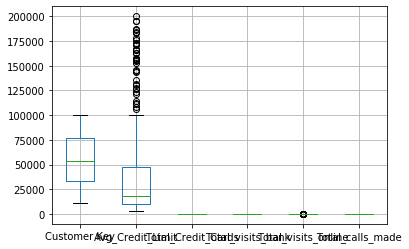

In [201]:
# Let us check for outliers now.
CCCusdf.boxplot()

# We could see some outliers for Avg_Credit_Limit and Total_visits_online.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f444961048>,
 'caps': [<matplotlib.lines.Line2D at 0x1f444961b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f444944c08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f44466b588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f44466ba08>],
 'means': []}

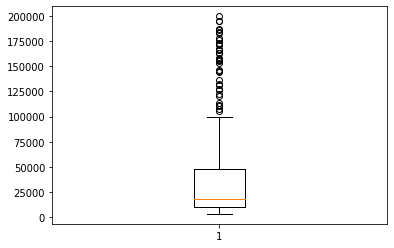

In [202]:
plt.boxplot(CCCusdf['Avg_Credit_Limit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f44498d688>,
 'caps': [<matplotlib.lines.Line2D at 0x1f44498dd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f444959e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f44496fc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f44496fd88>],
 'means': []}

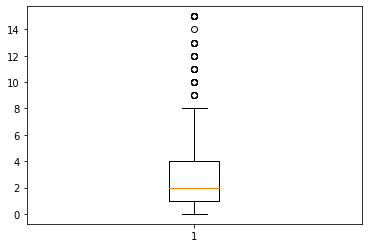

In [203]:
plt.boxplot(CCCusdf['Total_visits_online'])

In [205]:
# Let us take logaritmic transform for Avg_Credit_Limit and Total_visits_online to remove outliers
CCCusdf['Avg_Credit_Limit'] = np.log(CCCusdf['Avg_Credit_Limit'])
CCCusdf['Total_visits_online'] = np.log(CCCusdf['Total_visits_online'])

CCCusdf.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,2.443470,2,1,-inf,0
1,38414,2.381376,3,0,0.834032,9
2,17341,2.381376,7,1,0.094048,4
3,40496,2.333013,5,1,-inf,4
4,47437,2.443470,6,0,0.910235,3


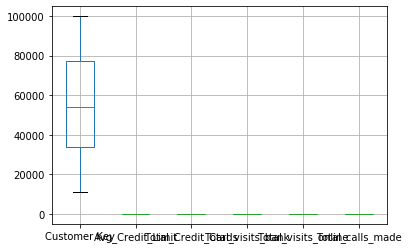

In [206]:
CCCusdf.boxplot()

# This looks better.

In [207]:
# Performing bivariate analysis including correlation, pairplots and state the inferences

In [208]:
# Correlation of variable
CCCusdf.corr(method='pearson')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.071723,-0.010281,-0.000560,-0.022921,0.005968
Avg_Credit_Limit,0.071723,1.000000,0.576086,0.086486,0.318116,-0.463646
Total_Credit_Cards,-0.010281,0.576086,1.000000,0.315796,0.160187,-0.651251
Total_visits_bank,-0.000560,0.086486,0.315796,1.000000,-0.606002,-0.506016
Total_visits_online,-0.022921,0.318116,0.160187,-0.606002,1.000000,0.127412
Total_calls_made,0.005968,-0.463646,-0.651251,-0.506016,0.127412,1.000000


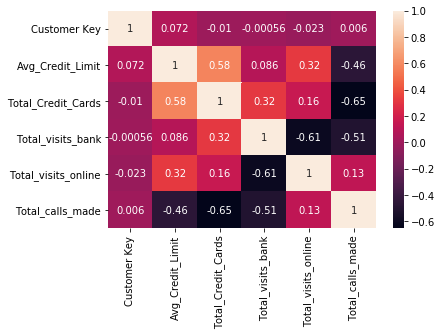

In [209]:
corr = CCCusdf.corr()
sns.heatmap(corr, annot = True)

In [211]:
# Relationship between variables shows come correlation. 

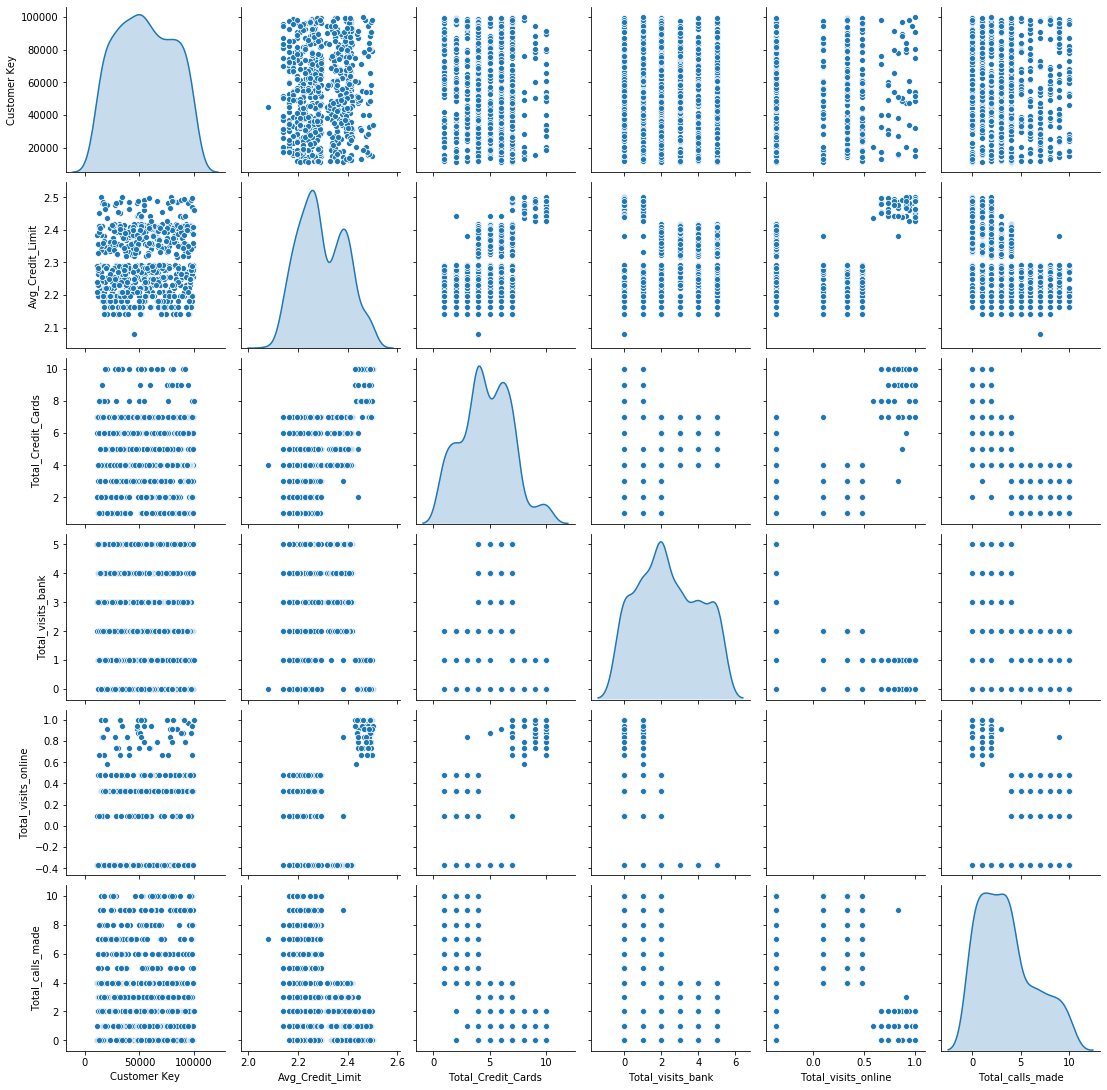

In [212]:
# A bivariate analysis among the different independent variables can be done using scatter matrix plot.
sns.pairplot(CCCusdf,diag_kind='kde')

In [216]:
CCCusdf.head()
# Total_visits_online column with infinity values.

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,2.443470,2,1,-inf,0
1,38414,2.381376,3,0,0.834032,9
2,17341,2.381376,7,1,0.094048,4
3,40496,2.333013,5,1,-inf,4
4,47437,2.443470,6,0,0.910235,3


In [217]:
# Replacing the infinity value with NaN
CCCusdf = CCCusdf.replace([np.inf, -np.inf], np.nan)

In [220]:
CCCusdf.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,2.443470,2,1,NaN,0
1,38414,2.381376,3,0,0.834032,9
2,17341,2.381376,7,1,0.094048,4
3,40496,2.333013,5,1,NaN,4
4,47437,2.443470,6,0,0.910235,3


In [222]:
#instead of dropping the rows, lets replace the missing values with mean value. 
CCCusdf.mean()

Customer Key           55141.443939
Avg_Credit_Limit           2.297932
Total_Credit_Cards         4.706061
Total_visits_bank          2.403030
Total_visits_online        0.064787
Total_calls_made           3.583333
dtype: float64

In [223]:
CCCusdf.fillna(CCCusdf.mean(), inplace=True)

In [224]:
CCCusdf.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,2.443470,2,1,0.064787,0
1,38414,2.381376,3,0,0.834032,9
2,17341,2.381376,7,1,0.094048,4
3,40496,2.333013,5,1,0.064787,4
4,47437,2.443470,6,0,0.910235,3


### Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [225]:
# Let us  scale the variables

CCCusdf = CCCusdf.apply(zscore)

In [226]:
# Let's group data into similar clusters
# Using K-Means clustering to group data based on their attribute. 
# First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

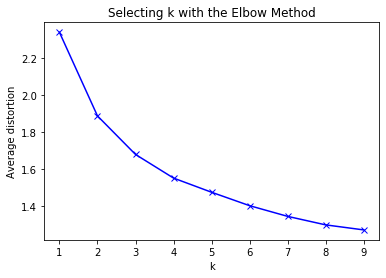

In [231]:
# Variables are mow scaled so let's find the optimal no.of clusters

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(CCCusdf)
    prediction=model.predict(CCCusdf)
    meanDistortions.append(sum(np.min(cdist(CCCusdf, model.cluster_centers_, 'euclidean'), axis=1)) / CCCusdf
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [321]:
# We could see the bend at 4, so let us create 4 custers

In [355]:
# Setting the value of k=4

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=2345)
CCCus_Kdf = kmeans.fit(CCCusdf)
CCCus_Kdf

KMeans(n_clusters=4, n_init=5, random_state=2345)

In [356]:
# Let's check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

# Distribution looks fine.

[200 185  50 225]


In [359]:
# let us check the centers in each group

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(CCCusdf) )
centroid_df.transpose()

,0,1,2,3
Customer Key,-0.817155,8.672891e-01,0.061203,-3.453537e-04
Avg_Credit_Limit,0.023756,3.548627e-01,1.869883,-7.284217e-01
Total_Credit_Cards,0.350356,4.026964e-01,1.862226,-1.056362e+00
Total_visits_bank,0.654351,6.843523e-01,-1.105763,-8.986103e-01
Total_visits_online,-0.430299,-4.323790e-01,2.236525,2.409937e-01
Total_calls_made,-0.556498,-5.530049e-01,-0.874330,1.143653e+00
group,2.000000,4.440892e-16,3.000000,1.000000e+00
labels,1.000000,2.000000e+00,3.000000,-2.220446e-15


In [360]:
# Group 1 has highest values for Customer Key while Group 3 has lowest for Total_visits_bank

In [361]:
# Assign the groups created above to the data frame and study the characteristics for each group.

In [362]:
# Adding cluster number to original customer data

predictions = kmeans.predict(CCCusdf)
predictions
CCCusdf["group"] = predictions
CCCusdf['group'] = CCCusdf['group'].astype('category')
CCCusdf.dtypes

Customer Key            float64
Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
labels                    int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4497EEE48>,
      dtype=object)

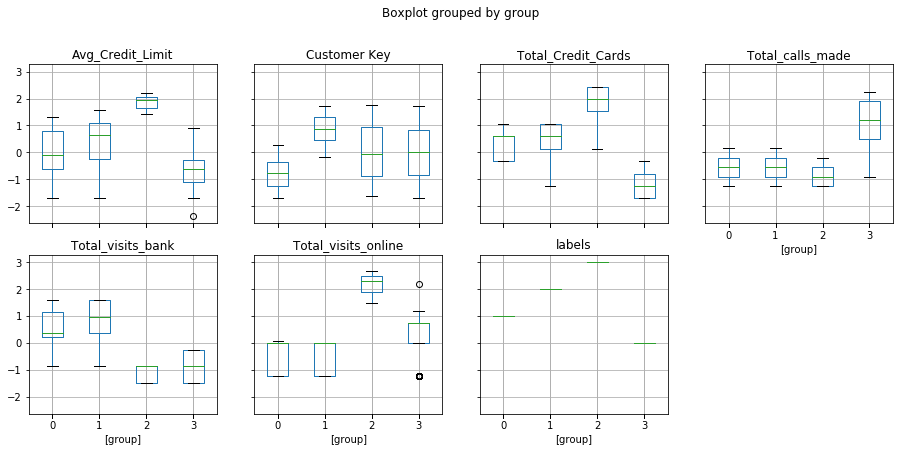

In [363]:
# Visualizing the centers

CCCusdf["group"] = predictions
CCCusdf.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

Text(0.5, 0.92, '3D plot of KMeans Clustering')

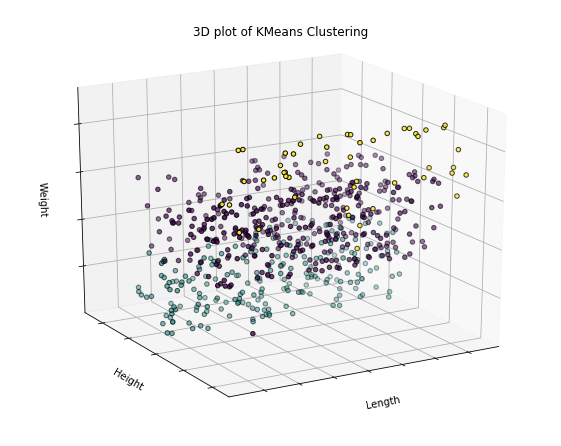

In [364]:
# 3D plots of clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(CCCusdf)
labels = k3_model.labels_
ax.scatter(CCCusdf.iloc[:, 0], CCCusdf.iloc[:, 1], CCCusdf.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

### Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [365]:
# Find out the linkage matrix
# Using ward as linkage metric and distance as Eucledian

In [366]:
# Generating  the linkage matrix

Z = linkage(CCCusdf, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [367]:
Z

array([[4.37000000e+02, 5.44000000e+02, 6.14643274e-02, 2.00000000e+00],
       [4.51000000e+02, 5.15000000e+02, 1.01504498e-01, 2.00000000e+00],
       [4.33000000e+02, 6.03000000e+02, 1.37275266e-01, 2.00000000e+00],
       ...,
       [1.31200000e+03, 1.31300000e+03, 3.08472266e+01, 3.85000000e+02],
       [1.30900000e+03, 1.31600000e+03, 4.21222526e+01, 4.35000000e+02],
       [1.31500000e+03, 1.31700000e+03, 7.10732814e+01, 6.60000000e+02]])

In [368]:
# Considering 4 clusters for Agglomerative clustering

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [369]:
model.fit(CCCusdf)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [370]:
CCCusdf['labels'] = model.labels_
CCCusdf.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,labels
0,1.246920,1.581342,-1.249225,-0.860451,4.751655e-16,-1.251537,1,3
1,-0.653203,0.906655,-0.787585,-1.473731,2.194867e+00,1.891859,3,0
2,-1.476098,0.906655,1.058973,-0.860451,8.348875e-02,0.145528,0,2
3,-0.571901,0.381168,0.135694,-0.860451,4.751655e-16,0.145528,0,2
4,-0.300857,1.581342,0.597334,-1.473731,2.412294e+00,-0.203739,2,1


In [371]:
CCCusdf.mean()

Customer Key           4.474535e-17
Avg_Credit_Limit      -5.113755e-16
Total_Credit_Cards    -4.006223e-15
Total_visits_bank      1.157323e-16
Total_visits_online    3.539256e-16
Total_calls_made      -7.112156e-16
group                  1.454545e+00
labels                 1.243939e+00
dtype: float64

In [372]:
# Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# The closer it is to 1, the better is the clustering

In [373]:
Z = linkage(CCCusdf, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(CCCusdf))

c

0.9083154364450132

In [337]:
# The cophenetic coeff. here is .90 which is closer to 1 hence it's better clustering.

In [374]:
Z = linkage(CCCusdf, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(CCCusdf))

c

0.8890298828765139

In [375]:
# The cophenetic coeff. here is .88 which is slightly less closer to 1 than the one we saw before.

In [376]:
Z = linkage(CCCusdf, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(CCCusdf))

c

0.8686781542840388

In [377]:
# The cophenetic coeff. here is .87 approx. which is not as closer to 1 than the two we saw before.

In [378]:
# Plotting the dendrogram for the consolidated dataframe

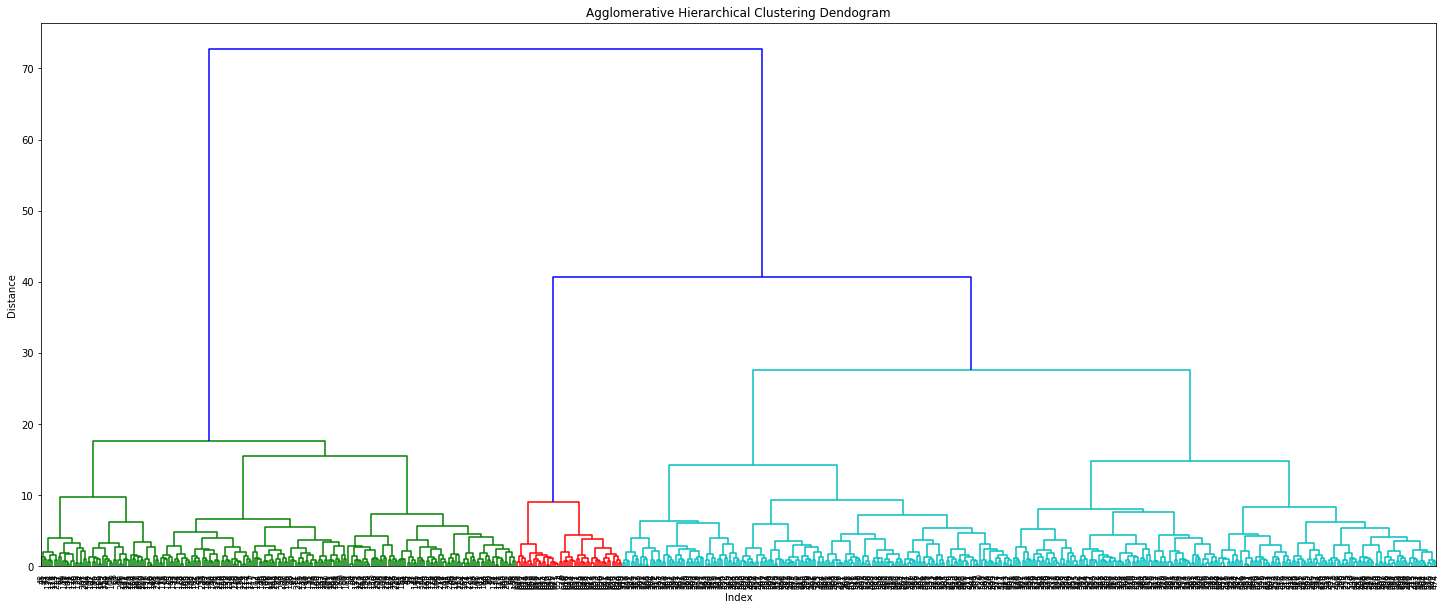

In [379]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.show()

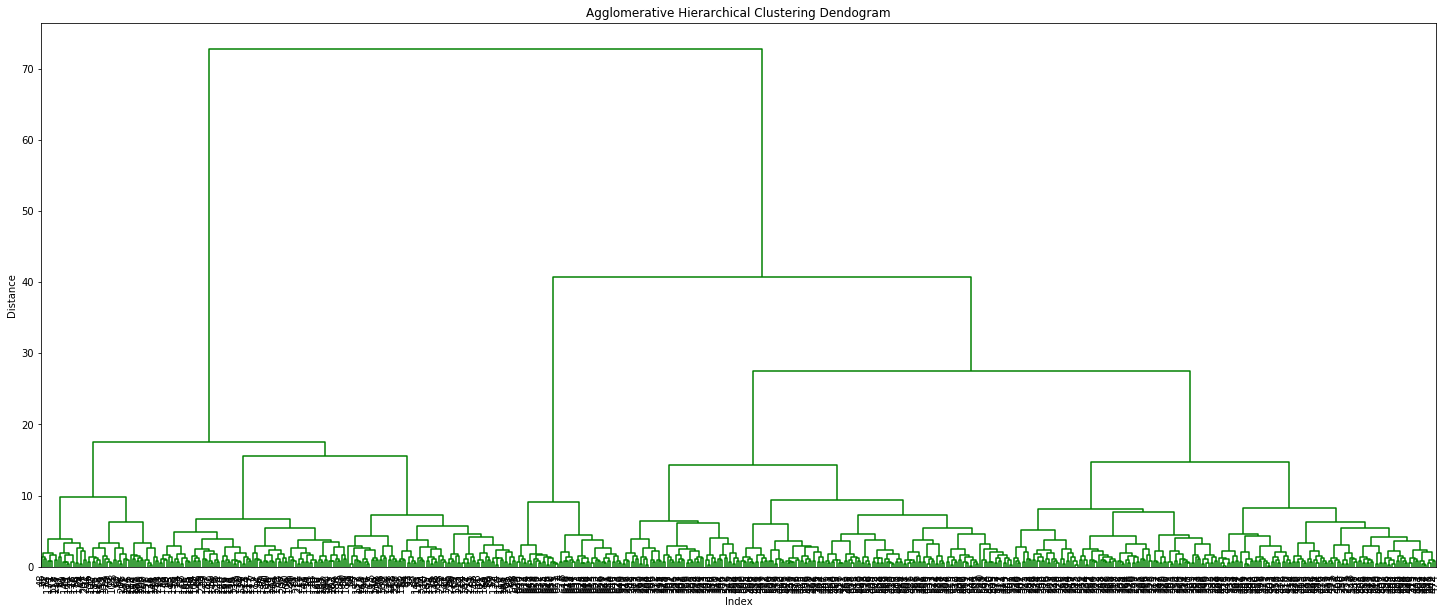

In [380]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 90,  leaf_font_size=10. )
plt.show()

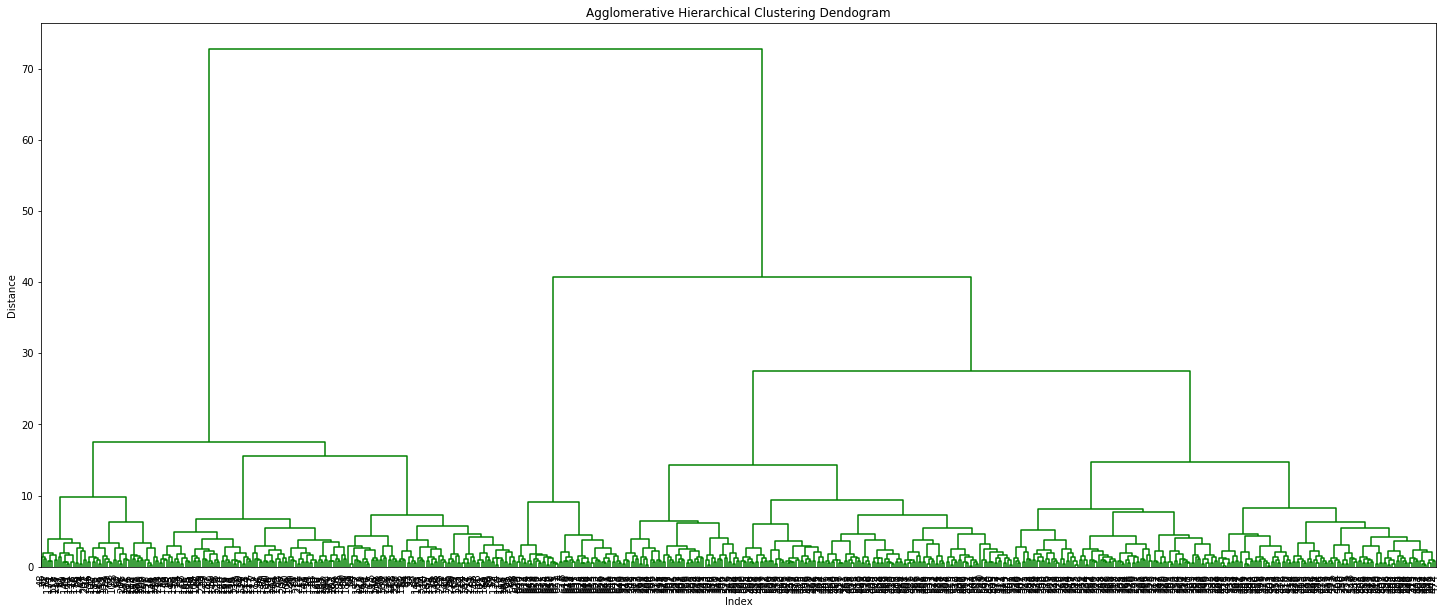

In [381]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 200,  leaf_font_size=10. )
plt.show()

In [382]:
# Recreating the dendrogram for last 14 merged clusters

In [383]:
# From the truncated dendrogram, we need to find out the optimal distance between clusters for input to clustering data

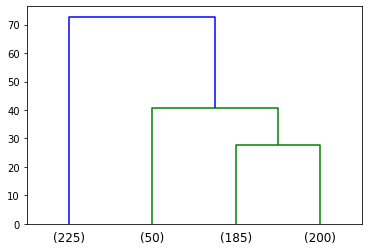

In [384]:
dendrogram(Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

In [385]:
max_d = 50

In [386]:
# Using this distance measure(max_d) and fcluster function to cluster the data into 4 different groups

In [387]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Calculate average silhouette score for both methods. (5 marks)

In [388]:
# Calculate Avg Silhoutte Score 

from sklearn.metrics import silhouette_score
silhouette_score(CCCusdf,clusters)

0.453884558596932

In [389]:
# Silhouette Score is better when closer 1.
# Here, it is 0.45 which is not very close to 1 and hence it is not so great.

### Compare K-means clusters with Hierarchical clusters. (5 marks)

In [393]:
# From the K-means cluster box plot we can see that there is a postive relationship. 
# Hence the K-means cluster concludes that the correlation between the variables, that is the thinking a depression is good.

In [392]:
# However, with the Hierarchical clustering dendograms and cophenetic coeff. we have seeing the coefficient to be very close to 1 with the value as high as 0.90 making it much better model. 

### Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [396]:
# How many different segments of customers are there?

# Answers:
# From both the K-means and Hierarchical clusting methods I have identifies there are 4 segments or clusters of customers for the above data set.
# These 4 segments of customer have been put into 4 groups.  

In [394]:
# How are these segments different from each other?

# Answers:
# The segments have been divided into 4 clusters or groups distributes accross over variables - Customers having total credit cards, Customers visitng banks, Customers using online facility, Customers calling over phone.
# Customers in Group 0 of the segment have the highest visits made online followed by customers in Group 1, 2 and 3.

In [397]:
# What are your recommendations to the bank on how to better market to and service these customers?

# Answers:
# The bank should target customers via online method.
# Also the bank shoud provide Customers with credit card more services online and help them better with the day to day transactions.